In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Public\project\data\data.csv")
data.head()

,Date,Close_EURUSD,High_EURUSD,Low_EURUSD,Open_EURUSD,Volume_EURUSD
0,2015-01-01 00:00:00,1.209863,1.209863,1.209863,1.209863,0
1,2015-01-02 00:00:00,1.208941,1.208956,1.201080,1.208868,0
2,2015-01-05 00:00:00,1.194643,1.197590,1.188909,1.195500,0
3,2015-01-06 00:00:00,1.193902,1.197000,1.188693,1.193830,0
4,2015-01-07 00:00:00,1.187536,1.190000,1.180401,1.187479,0


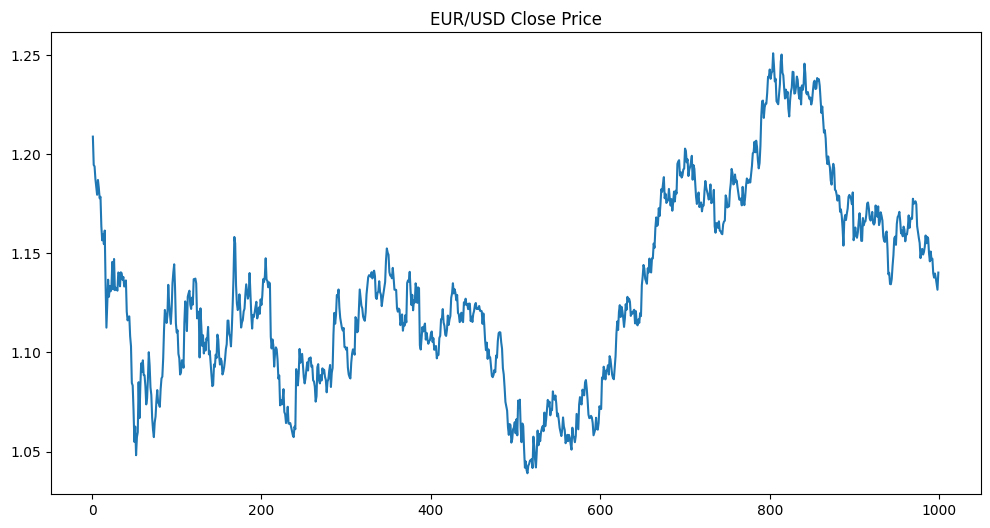

In [16]:
import matplotlib.pyplot as plt

t_close = data['Close_EURUSD']
t_close.plot(figsize=(12,6), title='EUR/USD Close Price')
plt.show()


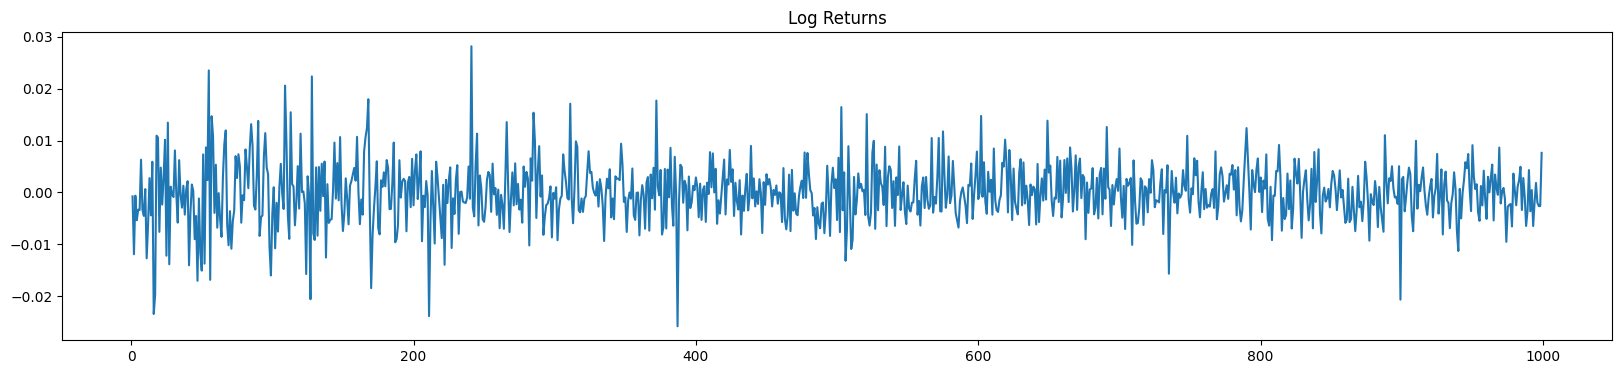

In [5]:
data['return']=data['Close_EURUSD'].pct_change()
data['log_return'] = np.log(data['Close_EURUSD'] / data['Close_EURUSD'].shift(1))
data=data.dropna()

ts = data['log_return']
ts.plot(figsize=(20,4), title="Log Returns")
plt.show()

In [7]:
data['return'].head()

1   -0.000762
2   -0.011827
3   -0.000621
4   -0.005332
5   -0.003314
Name: return, dtype: float64

In [8]:
#Check stationarity
from statsmodels.tsa.stattools import adfuller

result=adfuller(ts)
result

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -32.56594583627938
p-value: 0.0


In [9]:
#p-value = 0.0 < 0.05, we reject the null hypothesis, do not need differencing (d=0) in ARIMAs
#og return series is stationarys

In [31]:
import pmdarima as pm

model = pm.auto_arima(ts,
                      seasonal=False,  # False if no seasonality, checked with close graph
                      stepwise=True, 
                      trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7227.481, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7235.481, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7234.341, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7234.372, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7237.366, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7232.564, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.250 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3619.683
Date:                Thu, 04 Dec 2025   AIC                          -7237.366
Time:                        00:42:50   BIC                          -7232.460
Sample:                             0   HQIC                         -7235.502
    

In [ ]:
#ARIMA(0,0,0)

#This is white noise, meaning: No trend No autocorrelation No structure

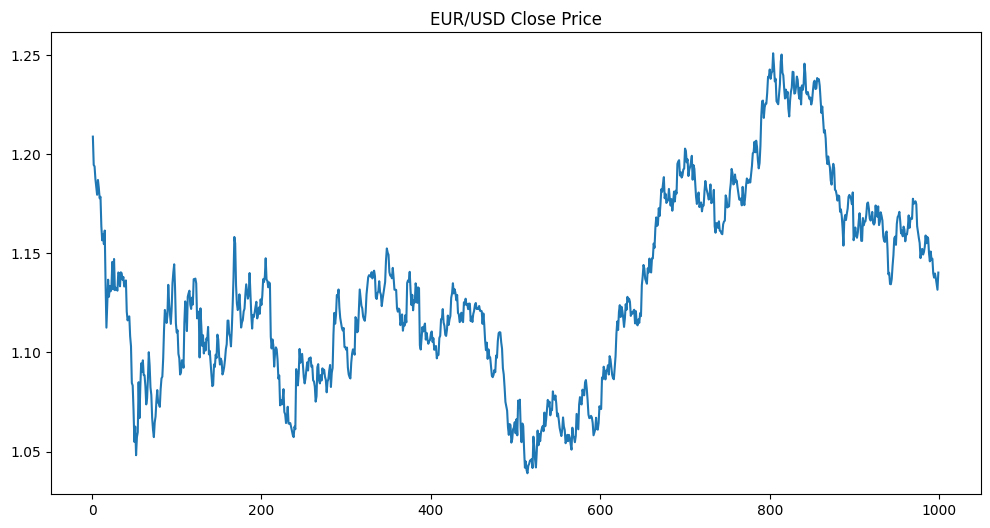

In [11]:

import matplotlib.pyplot as plt

ts = data['Close_EURUSD']
ts.plot(figsize=(12,6), title='EUR/USD Close Price')
plt.show()



In [13]:
n_periods = 10  #  steps to forecast
forecast, conf_int = model.predict(n_periods=n_periods,return_conf_int=True)


forecast


C:\Users\Public\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Public\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


999     0.0
1000    0.0
1001    0.0
1002    0.0
1003    0.0
1004    0.0
1005    0.0
1006    0.0
1007    0.0
1008    0.0
dtype: float64

In [14]:
conf_int

array([[-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907],
       [-0.01122907,  0.01122907]])

In [15]:
forecast_df = pd.DataFrame({
    "Forecast": forecast,
    "Lower_CI": conf_int[:,0],
    "Upper_CI": conf_int[:,1]
})
print(forecast_df)

      Forecast  Lower_CI  Upper_CI
999        0.0 -0.011229  0.011229
1000       0.0 -0.011229  0.011229
1001       0.0 -0.011229  0.011229
1002       0.0 -0.011229  0.011229
1003       0.0 -0.011229  0.011229
1004       0.0 -0.011229  0.011229
1005       0.0 -0.011229  0.011229
1006       0.0 -0.011229  0.011229
1007       0.0 -0.011229  0.011229
1008       0.0 -0.011229  0.011229


we do for price directly

In [17]:
#Check stationarity
from statsmodels.tsa.stattools import adfuller

result=adfuller(t_close)
result

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.4081969496335707
p-value: 0.1394362332992362


In [ ]:
#p-value = 0.0 < 0.05, we reject the null hypothesis, do not need differencing (d=0) in ARIMAs

In [32]:
import pmdarima as pm

model_2 = pm.auto_arima(t_close,
                      seasonal=True,  # False if no seasonality, checked with close graph
                      m=5,
                    stepwise=True, 
                      trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=-7223.907, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=-7235.481, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=-7233.287, Time=0.49 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=-7233.302, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=-7237.366, Time=0.09 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=-7234.533, Time=0.46 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=-7234.488, Time=0.51 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=-7231.906, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=-7234.341, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=-7234.372, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=-7232.564, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 6.404 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:       

In [33]:
n_periods = 30  #  steps to forecast
forecast, conf_int = model_2.predict(n_periods=n_periods,return_conf_int=True)


forecast

C:\Users\Public\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Public\project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


999     1.140329
1000    1.140329
1001    1.140329
1002    1.140329
1003    1.140329
1004    1.140329
1005    1.140329
1006    1.140329
1007    1.140329
1008    1.140329
1009    1.140329
1010    1.140329
1011    1.140329
1012    1.140329
1013    1.140329
1014    1.140329
1015    1.140329
1016    1.140329
1017    1.140329
1018    1.140329
1019    1.140329
1020    1.140329
1021    1.140329
1022    1.140329
1023    1.140329
1024    1.140329
1025    1.140329
1026    1.140329
1027    1.140329
1028    1.140329
dtype: float64

Shows very little day-to-day change
Has no strong trend
Has no weekly seasonality
Log returns were near zero

In [34]:
forecast_df = pd.DataFrame({
    "Forecast": forecast,
    "Lower_CI": conf_int[:,0],
    "Upper_CI": conf_int[:,1]
})
print(forecast_df)

      Forecast  Lower_CI  Upper_CI
999   1.140329  1.127721  1.152937
1000  1.140329  1.122499  1.158159
1001  1.140329  1.118492  1.162166
1002  1.140329  1.115114  1.165544
1003  1.140329  1.112137  1.168520
1004  1.140329  1.109447  1.171211
1005  1.140329  1.106972  1.173686
1006  1.140329  1.104669  1.175989
1007  1.140329  1.102506  1.178152
1008  1.140329  1.100460  1.180198
1009  1.140329  1.098514  1.182144
1010  1.140329  1.096655  1.184003
1011  1.140329  1.094871  1.185786
1012  1.140329  1.093155  1.187502
1013  1.140329  1.091500  1.189158
1014  1.140329  1.089898  1.190760
1015  1.140329  1.088346  1.192312
1016  1.140329  1.086839  1.193819
1017  1.140329  1.085373  1.195284
1018  1.140329  1.083946  1.196712
1019  1.140329  1.082553  1.198104
1020  1.140329  1.081194  1.199464
1021  1.140329  1.079865  1.200793
1022  1.140329  1.078564  1.202094
1023  1.140329  1.077291  1.203367
1024  1.140329  1.076042  1.204616
1025  1.140329  1.074818  1.205840
1026  1.140329  1.07

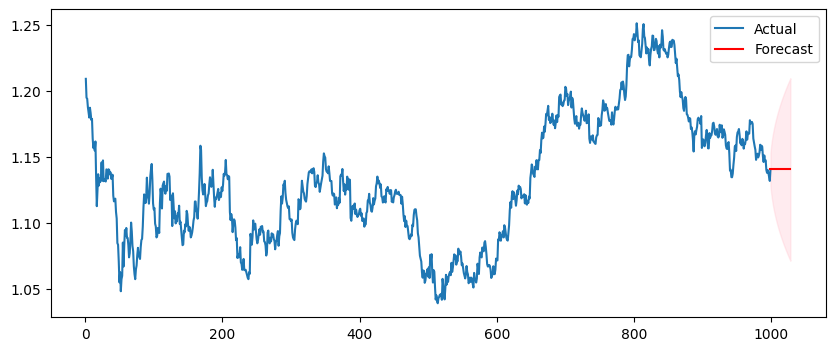

In [30]:
# Plot
plt.figure(figsize=(10,4))
plt.plot(t_close, label="Actual")
plt.plot(range(len(t_close), len(t_close)+n_periods), forecast, label="Forecast", color='red')

plt.fill_between(range(len(t_close), len(t_close)+n_periods),
                 conf_int[:,0], conf_int[:,1], color='pink', alpha=0.3)

plt.legend()
plt.show()


In [37]:
import os
import joblib

# Folder to save models
folder = "models"

# Make sure folder exists
if not os.path.exists(folder):
    os.makedirs(folder)

# Full path to save the model
model_path = os.path.join(folder, "model_ARIMA_forex.pkl")

# Save the model
joblib.dump(model_2, model_path)

print(f"Model saved to: {model_path}")

Model saved to: models\model_ARIMA_forex.pkl
